# Automatic Recognition of Persuasive Content on Electronic News

https://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project06%20-%20Text%20Summarization.ipynb

# Install Lib

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import nltk
import tensorflow as tf
import numpy as np

from nltk.corpus import stopwords
from keras.preprocessing import sequence
nltk.download("popular")

!pip install Sastrawi
!pip install nlp-id
!pip install transformers
!pip install torch
!pip install tensorflow
!pip install bertviz
!pip install joblib
!pip install networkx==2.6.
!pip install transformers==4.31.0
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

  Using cached transformers-4.31.0-py3-none-any.whl.metadata (116 kB)
  Using cached tokenizers-0.13.3.tar.gz (314 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached transformers-4.31.0-py3-none-any.whl (7.4 MB)
Failed to build tokenizers


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [62 lines of output]
  C:\Users\Asiyah\AppData\Local\Temp\pip-build-env-0akyqpnh\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: Apache Software License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_expression()
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\tokenizers
  copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers
  creating build\lib.win-amd64-cpyt

# Init Data

In [3]:
from io import BytesIO

import requests
import pandas as pd

r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1i3BBozbnx9HSTkMsfMHChvzYwG_2MiFB06U05gitD8U&output=xlsx')
data = r.content
dataset = pd.read_excel(data, 'Prepocessed (3)', dtype=str, index_col=None)

C:\Users\Asiyah\AppData\Local\Temp\ipykernel_18960\3390696530.py:8: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataset = pd.read_excel(data, 'Prepocessed (3)', dtype=str, index_col=None)


In [4]:
len(dataset)

2502

In [5]:
dataset

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

In [6]:
import re

def changeQuotation(text):
  text = re.sub(r'"',r'“', text)
  return text

In [7]:
dataset['content per paragraf'] = dataset['content per paragraf'].apply(changeQuotation)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def feature_engineering(content):
  tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
  dt_matrix = tv.fit_transform(content)
  dt_matrix = dt_matrix.toarray()

  vocab = tv.get_feature_names_out()
  td_matrix = dt_matrix.T
  return td_matrix,dt_matrix

## Split dataset

In [9]:
# Misalkan menggunakan `content_lemma` sebagai input
texts = dataset['content_lemma'].values
# Variabel target y adalah kombinasi dari empat label
y = dataset['labels'].values

In [10]:
# x_train1,y_train,x_test1,y_test = train_test_split(embed1,y,80)
# x_train1,x_test1,y_train,y_test = train_test_split(embed1, y, test_size=0.3, random_state=0)
from sklearn.model_selection import KFold

# kf = KFold(n_splits=4)           #KFold(n_splits=’warn’, shuffle=False, random_state=None)
kf = KFold(5,shuffle=True, random_state=0) # Use for KFold classification

for train_index, validation_index in kf.split(texts):
   #print("TRAIN:", texts[train_index], "VALIDATION:", texts[validation_index])
   x_train, x_test = texts[train_index], texts[validation_index]
   y_train, y_test = y[train_index], y[validation_index]

(2002, 2)


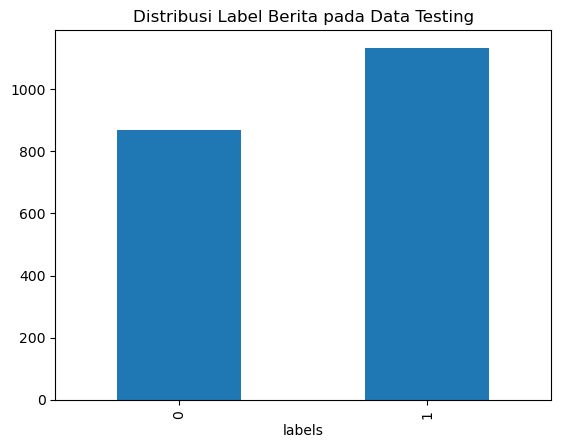

In [11]:
import matplotlib.pyplot as plt

df_train = pd.DataFrame(list(zip(x_train, y_train)), columns=['content_lemma', 'labels'])
df_train.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_train.shape)

(500, 2)


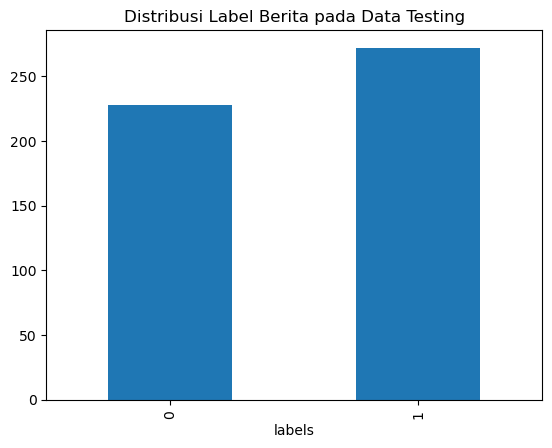

In [12]:
df_test = pd.DataFrame(list(zip(x_test, y_test)), columns=['content_lemma', 'labels'])
df_test.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_test.shape)

# Word Embedding (BERT)

In [13]:
from transformers import BertForSequenceClassification, BertConfig, BertTokenizer, BertModel
from transformers import TFBertModel
#tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1', do_lower_case=True)
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1', do_lower_case=True)
indobert = TFBertModel.from_pretrained('indobenchmark/indobert-base-p1', from_pt=True)

C:\Users\Asiyah\anaconda3\envs\asiyah_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [14]:
#model = BertModel.from_pretrained('indobenchmark/indobert-base-p1', output_hidden_states = True)
#model.eval()

In [15]:
max_len = 257
def encode_texts(text_list):
   # Inisialisasi list untuk menampung hasil
    input_ids = []
    attention_masks = []

    for text in text_list:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,  # Tambahkan [CLS] dan [SEP]
            max_length=max_len,
            padding='max_length',
            truncation=True,  # Aktifkan pemotongan jika teks lebih panjang
            return_tensors='tf',  # Mengembalikan TensorFlow tensors
            return_attention_mask=True  # Menghasilkan attention mask
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    return {'input_ids': tf.concat(input_ids, axis=0), 'attention_mask': tf.concat(attention_masks, axis=0)}

In [16]:
# Encode data training dan testing
train_encodings = encode_texts(x_train)
test_encodings = encode_texts(x_test)

In [17]:
# build model fine tuning bert
# def get_embeddings(encoded_texts, batch_size=16):
#     outputs = indobert(encoded_texts['input_ids'], attention_mask=encoded_texts['attention_mask'])
#     return outputs.last_hidden_state  # Mengambil output embeddings

# Function to get embeddings with smaller batch size
def get_embeddings(encoded_texts, batch_size=16):
    embeddings = []
    for i in range(0, len(encoded_texts['input_ids']), batch_size):
        batch_input_ids = encoded_texts['input_ids'][i:i+batch_size]
        batch_attention_mask = encoded_texts['attention_mask'][i:i+batch_size]
        outputs = indobert(batch_input_ids, attention_mask=batch_attention_mask)
        embeddings.append(outputs.last_hidden_state)
    return tf.concat(embeddings, axis=0)

# Mendapatkan embeddings untuk data training dan testing
train_embeddings = get_embeddings(train_encodings)
test_embeddings = get_embeddings(test_encodings)

ResourceExhaustedError: {{function_node __wrapped__ConcatV2_N_126_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[2002,257,768] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:ConcatV2] name: concat

In [ ]:
# import torch
# # Forward pass, dapatkan hidden states
# with torch.no_grad():
#     outputs = model()
#     hidden_states = outputs[2]

In [ ]:
from tensorflow.keras.layers import Input
# Input untuk token IDs dan attention mask
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

In [ ]:
# Verifikasi tipe dan shape dari input_ids dan attention_mask
print(f"Type of input_ids: {type(input_ids)}")
print(f"Shape of input_ids: {input_ids.shape}")
print(f"Type of attention_mask: {type(attention_mask)}")
print(f"Shape of attention_mask: {attention_mask.shape}")

# Save Embedding Model

In [ ]:
# # Step 1: Menyimpan embedding matrix
# train_npy = 'tesis/Thesis Persuasive Detection at Paragraph-Level/Embeddings Model/BERT_train.npy'
# test_npy = 'tesis/Thesis Persuasive Detection at Paragraph-Level/Embeddings Model/BERT_test.npy'

# # Simpan embedding matrix ke dalam file .npy
# np.save(train_npy, train_embeddings)
# np.save(test_npy, test_embeddings)
# print(f"Embedding matrix saved to .../Thesis Persuasive Detection at Paragraph-Level  /Embedding Models/")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from transformers import TFBertModel, BertTokenizer

class BertLayer(Layer):
    def __init__(self, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.indobert = TFBertModel.from_pretrained('indobenchmark/indobert-base-p1', from_pt=True)

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.indobert(input_ids, attention_mask=attention_mask)
        return output.last_hidden_state

# Definisikan input Keras
input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

# Gunakan BertLayer di dalam model Keras
bert_output = BertLayer()([input_ids, attention_mask])

In [ ]:
# Mendapatkan embeddings dari IndoBERT
# bert_output = indobert(input_ids, attention_mask=attention_mask)
sequence_output = bert_output[0]  # Mengambil last_hidden_state
sequence_output

# SVM

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

y_train_dl = tf.keras.utils.to_categorical(y_train)
y_test_dl = tf.keras.utils.to_categorical(y_test)

#Train the model using the training sets
clf.fit(x={train_embeddings,
                    y=y_train_dl,
                    validation_data=(test_embeddings,
                    y_test_dl)

#Predict the response for test dataset
y_pred = clf.predict(test_embeddings)

In [ ]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',  # Gunakan 'sparse_categorical_crossentropy' jika label adalah integer
#               metrics=['accuracy'])

In [ ]:
history = model.fit(x={'input_ids':train_encodings['input_ids'], 'attention_mask':train_encodings['attention_mask']},
                    y=y_train_dl,
                    validation_data=(test_embeddings,y_test_dl),
                    epochs=10,
                    batch_size=8)

In [ ]:
# Prediction
from sklearn.metrics import classification_report

predicted_raw = model.predict(
    {'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']})

y_pred = np.argmax(predicted_raw, axis=1)
y_true = y_test_dl

# Periksa tipe data
print(f'y_true dtype: {y_true.dtype}, shape: {y_true.shape}')
print(f'y_pred dtype: {y_pred.dtype}, shape: {y_pred.shape}')

# Ubah y_true dari one-hot encoded ke label kelas
if y_true.ndim == 2:
    y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, y_pred))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["Native Ads", "Berita Murni"]

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## roc

In [ ]:
from sklearn import metrics

y = np.array(y_true)

scores = np.array(y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=9)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_pred)
auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
auc_rf

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (y_true, y_pred)

In [ ]:
plot_roc_curve (fpr,tpr)

In [ ]:
roc_auc_score(y_true, y_pred)

In [ ]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_true, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(y_true, y_pred)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Menampilkan data yang salah di deteksi

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    TP_indices = []
    TN_indices = []
    FP_indices = []
    FN_indices = []

    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
            TP_indices.append(i)
        elif y_hat[i] == 1 and y_actual[i] != y_hat[i]:  # False Positive
            FP += 1
            FP_indices.append(i)
        elif y_actual[i] == y_hat[i] == 0:
            TN += 1
            TN_indices.append(i)
        elif y_hat[i] == 0 and y_actual[i] != y_hat[i]:  # False Negative
            FN += 1
            FN_indices.append(i)

    return TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices

In [ ]:
perf_measure(y_true, y_pred)

In [ ]:
# Calculate the performance metrics and retrieve indices
TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices = perf_measure(y_true, y_pred)

# Select the FP and FN data from the dataset
FP_data = dataset.iloc[FP_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]
FN_data = dataset.iloc[FN_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]

In [ ]:
# Display the results
print("False Positives (FP):")
print(FP_data)
print('Jumlah dari FP adalah',len(FP_data), 'paragraf.')

print("\nFalse Negatives (FN):")
print(FN_data)
print('Jumlah dari FN adalah',len(FN_data), 'paragraf.')

In [ ]:
import os
# Specify the folder path
folder_path = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Mine/BiLSTM/salah deteksi/'  # Replace this with your desired folder path

# Full paths for saving files
fp_file_path = os.path.join(folder_path, 'FP_Data_BERT-BiLSTM-Biner.csv.csv')
fn_file_path = os.path.join(folder_path, 'FN_Data_BERT-BiLSTM-Biner.csv.csv')

# Save FP_data and FN_data to CSV files within the specified folder
FP_data.to_csv(fp_file_path, index=False)
FN_data.to_csv(fn_file_path, index=False)

# Word Cloud 

## FP & FN

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam kolom 'content per paragraf' untuk FP dan FN
fp_text = " ".join(paragraph for paragraph in FP_data['content_stopwords'])
fn_text = " ".join(paragraph for paragraph in FN_data['content_stopwords'])

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk False Positives
plot_wordcloud(fp_text, "Word Cloud for False Positives (FP)")

# Membuat word cloud untuk False Negatives
plot_wordcloud(fn_text, "Word Cloud for False Negatives (FN)")

## TP & TN

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil data TP dan TN dari dataset
TP_data = dataset.iloc[TP_indices]['content_stopwords']
TN_data = dataset.iloc[TN_indices]['content_stopwords']

# Gabungkan teks dari TP dan TN
tp_text = " ".join(paragraph for paragraph in TP_data)
tn_text = " ".join(paragraph for paragraph in TN_data)

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk True Positives
plot_wordcloud(tp_text, "Word Cloud for True Positives (TP)")

# Membuat word cloud untuk True Negatives
plot_wordcloud(tn_text, "Word Cloud for True Negatives (TN)")